# Homework Reflections Week 5 - Week 8

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors

### Week 5

*Question 1*

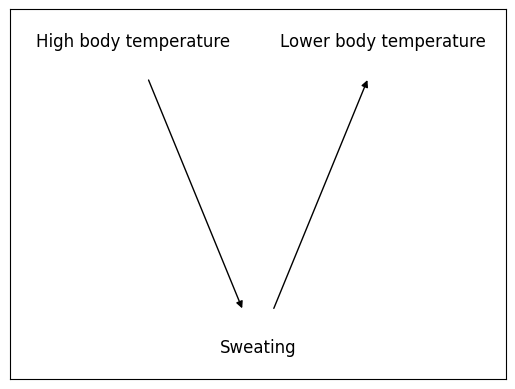

In [8]:
plt.margins(x=0.4)

G = nx.DiGraph()

# add edges from a list of tuples
G.add_edges_from([
    ("High body temperature", "Sweating"),
    ("Sweating", "Lower body temperature"),
])

# fix the positions of all three nodes
fixed_positions = {
    "High body temperature": (0, 1),
    "Sweating": (1, 0),
    "Lower body temperature": (2, 1)
}

# draw the network
nx.draw_networkx(
    G,
    with_labels=True,
    node_color="white",
    node_size=1000,
    pos=fixed_positions,
    min_source_margin=30,
    min_target_margin=30
)

plt.show()

*Question 3*

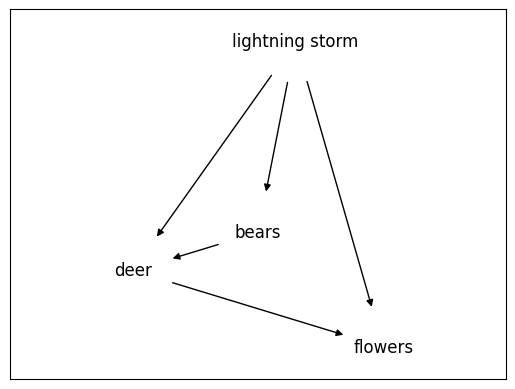

const              16.719438
deer               -2.159427
lightning_storm     2.888564
bears               0.012124
dtype: float64

In [25]:
# create a directed graph
plt.margins(x = 0.4)

G = nx.DiGraph()

# add edges from a list of tuples
G.add_edges_from([('lightning storm', 'deer'),\
                  ('lightning storm', 'bears'),\
                  ('lightning storm', 'flowers'),\
                  ('bears', 'deer'),\
                  ('deer', 'flowers')])

# fix the positions of all three nodes
fixed_positions = {'lightning storm':(1.3,2),\
                   'bears':(1,0.75), \
                   'deer':(0,0.5), \
                   'flowers':(2,0)}

# draw the network
nx.draw_networkx(G,\
                 with_labels = True,\
                 node_color = 'white',\
                 node_size = 1000, \
                 pos = fixed_positions, min_source_margin = 30, min_target_margin = 30)

plt.show()

# Simulated dataset
num = 100000
Z_lightning_storm = np.random.binomial(1, 0.5, num)
Z_bears = np.maximum(np.random.normal(4, 2, num) - 2 * Z_lightning_storm, 0)
X_deer = np.maximum(np.random.normal(8, 2, num) - Z_lightning_storm - 0.5 * Z_bears, 0)
Y_flowers = np.maximum(20 + 4 * Z_lightning_storm - 3 * X_deer + np.random.normal(0, 1, num), 0)

# put all variables in one table
df = pd.DataFrame({'lightning_storm': Z_lightning_storm,
                   'bears': Z_bears,
                   'deer': X_deer,
                   'flowers': Y_flowers})

# closing the backdoor path
results = sm.OLS(df['flowers'], sm.add_constant(df[['deer','lightning_storm', 'bears']])).fit()
results.params


*Question 4*

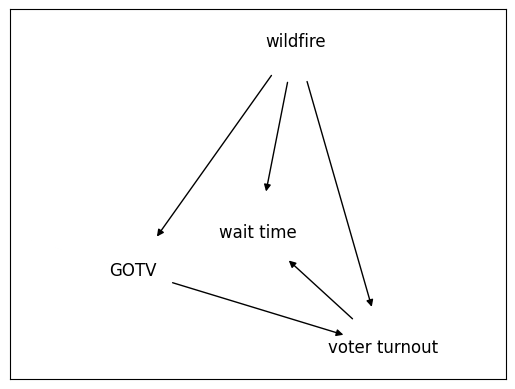

In [31]:
# create a directed graph
plt.margins(x = 0.4)

G = nx.DiGraph()

# add edges from a list of tuples
G.add_edges_from([('wildfire', 'GOTV'),\
                  ('wildfire', 'voter turnout'),\
                  ('wildfire', 'wait time'),\
                  ('voter turnout', 'wait time'),\
                  ('GOTV', 'voter turnout')])

# fix the positions of all three nodes
fixed_positions = {'wildfire':(1.3,2),\
                   'wait time':(1,0.75), \
                   'GOTV':(0,0.5), \
                   'voter turnout':(2,0)}

# draw the network
nx.draw_networkx(G,\
                 with_labels = True,\
                 node_color = 'white',\
                 node_size = 1000, \
                 pos = fixed_positions, min_source_margin = 30, min_target_margin = 30)

plt.show()

# Week 6

*Question 2*

In [5]:
data = pd.read_csv('homework_6.1.csv')

# Split data
treated = data[data["X"] == 1]
control = data[data["X"] == 0]

X_treated = treated[["Z"]].values
X_control = control[["Z"]].values

# ATU estimation (90th percentile) using Nearest Neighbors matching
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_treated)

_, indices = nn.kneighbors(X_control)
matched_treatment_outcomes = treated.iloc[indices.flatten()]['Y'].values
treatment_effects = matched_treatment_outcomes - control['Y'].values
percentile_90 = np.percentile(treatment_effects, 90)
print(f'Estimated 90th Percentile Treatment Effect: {percentile_90}')

Estimated 90th Percentile Treatment Effect: 1.9279622855613059
